In [52]:
import subprocess
import datetime
import psycopg2
import time

def ping_server(target):
    # Execute the ping command
    ping_process = subprocess.Popen(['ping', '-c', '5', target], stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    ping_output, _ = ping_process.communicate()
    return ping_output.decode('utf-8')

def parse_ping_output(output):
    # Parse the ping output to extract the round-trip time
    lines = output.split('\n')

    # Iterate over each line
    for line in lines:
        # Check if the line contains 'round-trip'
        if 'round-trip' in line:
            # Extract the round-trip time portion of the line
            rtt = line.split(' = ')[1].split('/')[1]
            
            # Return the average round-trip time as a float
            return float(rtt)

def save_ping_result_to_database(activity, target, rtt):
    # Connect to the PostgreSQL database
    conn = psycopg2.connect(
        dbname='dmname',
        user='user',
        password='password',
        host='localhost',
        port='port'
    )
    cursor = conn.cursor()

    # Insert the ping result into the database
    timestamp = datetime.datetime.now()
    cursor.execute('INSERT INTO ping_results (timestamp, activity, target, rtt) VALUES (%s, %s, %s, %s)', (timestamp, activity, target, rtt))

    # Commit the transaction and close the connection
    conn.commit()
    conn.close()

if __name__ == "__main__":
    activity = input("Enter the activity you are doing: ")
    target_server = 'google.com'
    
    while True:
        ping_output = ping_server(target_server)
        rtt = parse_ping_output(ping_output)
        save_ping_result_to_database(activity, target_server, rtt)
        print(f"Ping result saved for activity: {activity}")
        time.sleep(20)

KeyboardInterrupt: Interrupted by user

In [33]:
import pandas as pd

df = pd.read_csv('ping_results.csv')


In [47]:
pg.anova(dv='rtt', between='activity', data=df, detailed=True)

,Source,SS,DF,MS,F,p-unc,np2
0,activity,7.355651e+03,5,1471.130249,0.556258,0.733596,0.003853
1,Within,1.901534e+06,719,2644.692560,NaN,NaN,NaN


In [49]:
import pingouin as pg
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df.groupby('activity')['rtt'].agg(['mean', 'std'])

,mean,std
activity,,
browsing,91.751465,47.028142
idle,97.239460,57.934308
roku_channel,100.698078,51.690217
twitch,92.421208,50.304928
uTorrent,92.190488,46.821427
youtube,95.438064,52.147553


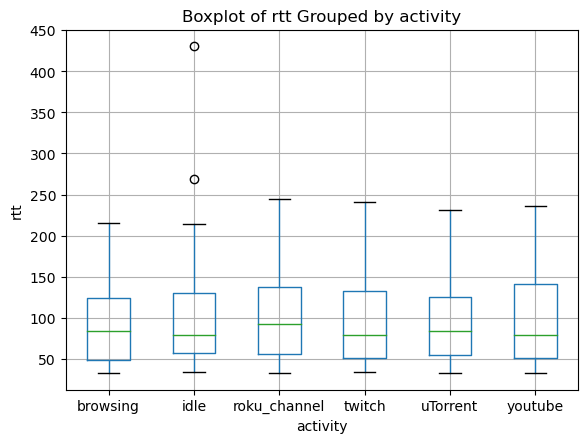

In [51]:

df.boxplot(column='rtt', by='activity')
plt.title('Boxplot of rtt Grouped by activity')
plt.xlabel('activity')
plt.ylabel('rtt')
plt.suptitle('')
plt.show()